In [ ]:
import networkx as nx
import osmnx as ox
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

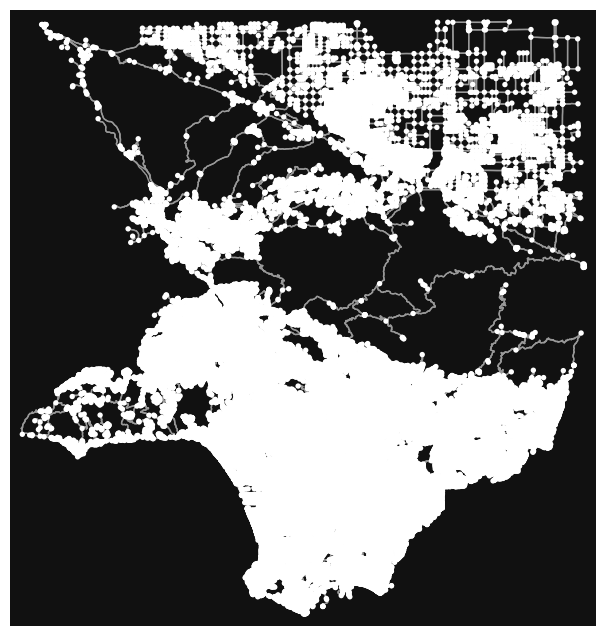

In [2]:
G = ox.graph.graph_from_place("Los Angeles, California, USA", network_type="drive")
fig, ax = ox.plot.plot_graph(G)

In [ ]:
gdf_edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

In [4]:
# Get bounding box of LA network in lon/lat
minx, miny, maxx, maxy = gdf_edges.total_bounds

# Cell size in degrees (adjust depending on resolution you want)
# ~0.01° latitude ≈ 1.1 km, but longitude degrees vary with latitude
cell_size = 0.01  

# Generate grid cells
grid_cells = []
x_left = minx
while x_left < maxx:
    y_bottom = miny
    while y_bottom < maxy:
        x_right = x_left + cell_size
        y_top = y_bottom + cell_size
        grid_cells.append(box(x_left, y_bottom, x_right, y_top))
        y_bottom = y_top
    x_left = x_right

grid = gpd.GeoDataFrame(grid_cells, columns=["geometry"], crs="EPSG:4326")


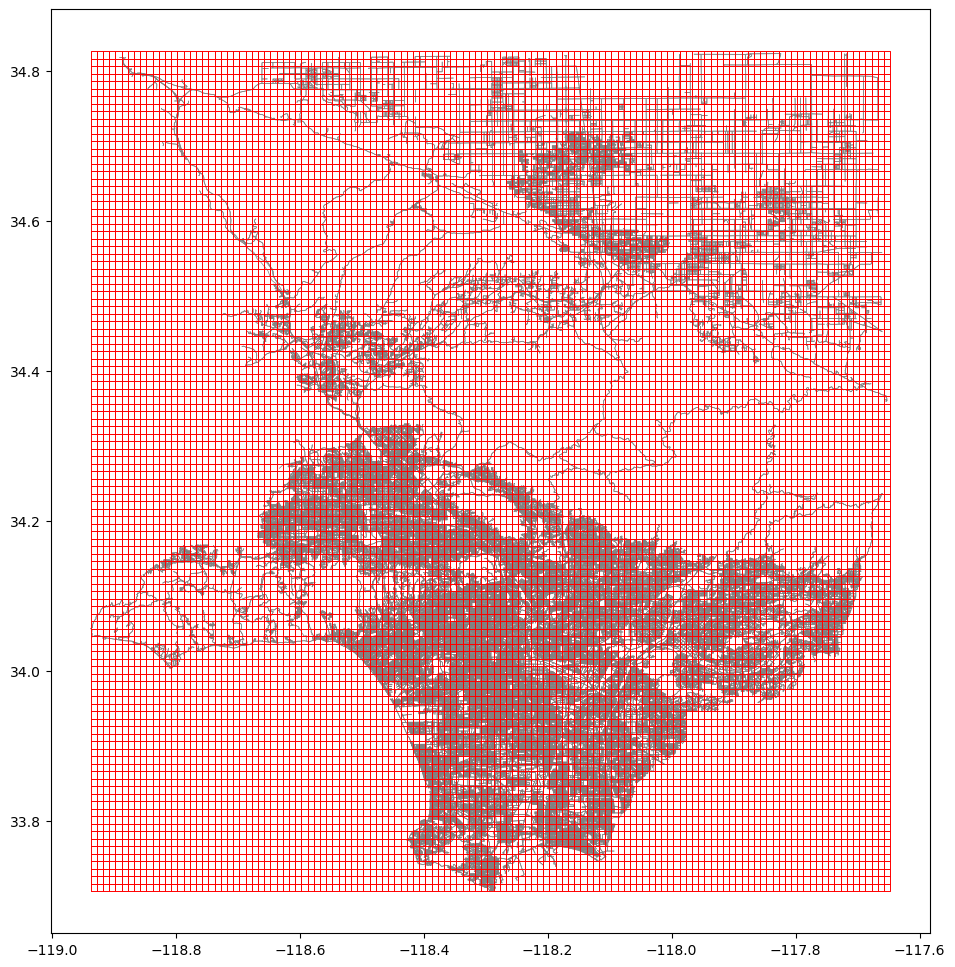

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf_edges.plot(ax=ax, linewidth=0.5, color="gray")
grid.boundary.plot(ax=ax, linewidth=0.7, color="red")
plt.show()